## Lets Import Libraries and Clean the Data

In [1]:
# importimg libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# importing the dataset
data=pd.read_csv('cars.csv')
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
# lets rename the columns for better understanding
data.columns=['mileage','cylinders','dispersion','horsepower','weight','acceleration','model_year','origin','car_type','car_name']

In [4]:
data.head()

,mileage,cylinders,dispersion,horsepower,weight,acceleration,model_year,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [5]:
# lets drop the car name column as it is not useful for our analysis
data.drop('car_name',axis=1,inplace=True)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# lets replace origin from 0,1,2 to USA, Europe, Japan
data['origin']=data['origin'].replace({1:'USA',2:'Europe',3:'Japan'})
data=pd.get_dummies(data,columns=['origin'],dtype='int')

In [7]:
data.head()

,mileage,cylinders,dispersion,horsepower,weight,acceleration,model_year,car_type,origin_Europe,origin_Japan,origin_USA
0,18.0,8,307.0,130,3504,12.0,70,0,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,0,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,0,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,0,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,0,0,0,1


In [8]:
data.isna().sum()

mileage          0
cylinders        0
dispersion       0
horsepower       0
weight           0
acceleration     0
model_year       0
car_type         0
origin_Europe    0
origin_Japan     0
origin_USA       0
dtype: int64

In [9]:
# some data is containing '?', lets replace it with NaN
data.replace('?',np.nan,inplace=True)

In [10]:
data.isna().sum()

mileage          0
cylinders        0
dispersion       0
horsepower       6
weight           0
acceleration     0
model_year       0
car_type         0
origin_Europe    0
origin_Japan     0
origin_USA       0
dtype: int64

In [11]:
#lets check data types
data.dtypes

mileage          float64
cylinders          int64
dispersion       float64
horsepower        object
weight             int64
acceleration     float64
model_year         int64
car_type           int64
origin_Europe      int32
origin_Japan       int32
origin_USA         int32
dtype: object

In [12]:
#lets convert horsepower to float and fill NaN with median value
data['horsepower']=data['horsepower'].astype(float)
data['horsepower'].fillna(data['horsepower'].median(),inplace=True)

In [13]:
data.isna().sum()

mileage          0
cylinders        0
dispersion       0
horsepower       0
weight           0
acceleration     0
model_year       0
car_type         0
origin_Europe    0
origin_Japan     0
origin_USA       0
dtype: int64

## Model Building

In [14]:
# lets divide the data into dependent and independent variables
x=data.drop('mileage',axis=1)
y=data['mileage']

In [15]:
x.head()

,cylinders,dispersion,horsepower,weight,acceleration,model_year,car_type,origin_Europe,origin_Japan,origin_USA
0,8,307.0,130.0,3504,12.0,70,0,0,0,1
1,8,350.0,165.0,3693,11.5,70,0,0,0,1
2,8,318.0,150.0,3436,11.0,70,0,0,0,1
3,8,304.0,150.0,3433,12.0,70,0,0,0,1
4,8,302.0,140.0,3449,10.5,70,0,0,0,1


In [16]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mileage, dtype: float64

### Scaling

In [17]:
x_s=preprocessing.scale(x)
y_s=preprocessing.scale(y)

In [18]:
type(x_s),type(y_s)

(numpy.ndarray, numpy.ndarray)

In [19]:
# lets convert this scaled array to dataframe
x_s=pd.DataFrame(x_s,columns=x.columns)
y_s=pd.DataFrame(y_s,columns=['mileage'])

In [20]:
x_s.head()

,cylinders,dispersion,horsepower,weight,acceleration,model_year,car_type,origin_Europe,origin_Japan,origin_USA
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,-0.461968,-0.497643,0.773559
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,-0.461968,-0.497643,0.773559
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,-0.461968,-0.497643,0.773559
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,-0.461968,-0.497643,0.773559
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,-0.461968,-0.497643,0.773559


In [21]:
y_s.head()

,mileage
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543


In [22]:
# lets divide into train and test data
x_train,x_test,y_train,y_test=train_test_split(x_s,y_s,test_size=0.30,random_state=1)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((278, 10), (120, 10), (278, 1), (120, 1))

## Simple Linear Model

In [24]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

for i,col in enumerate(x_train.columns):
    print(f'    The coefficient of {col} : {regression_model.coef_[0][i]}')

print('--------------------------------------------------------------------------')

intercept=regression_model.intercept_[0]
print(f'    The intercept of the model is : {intercept}')

    The coefficient of cylinders : 0.3210223856916098
    The coefficient of dispersion : 0.32483430918483974
    The coefficient of horsepower : -0.2291695005943759
    The coefficient of weight : -0.7112101905072298
    The coefficient of acceleration : 0.014713682764191022
    The coefficient of model_year : 0.3755811949510743
    The coefficient of car_type : 0.38147694842330954
    The coefficient of origin_Europe : 0.048348549539454035
    The coefficient of origin_Japan : 0.044515252035678146
    The coefficient of origin_USA : -0.07472247547584192
--------------------------------------------------------------------------
    The intercept of the model is : 0.019284116103639736


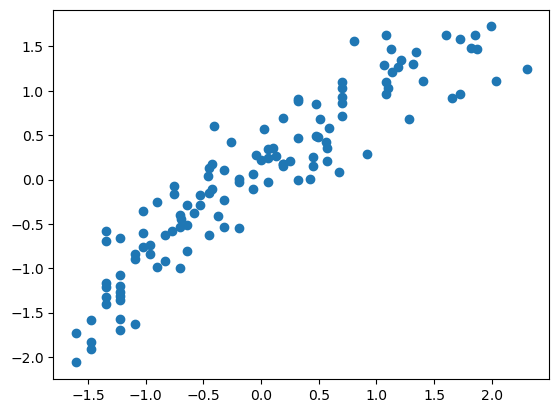

In [25]:
prediction=regression_model.predict(x_test)
plt.scatter(y_test,prediction)

## Regularized Ridge Regression

In [26]:
ridge_model=Ridge(alpha=0.5)
ridge_model.fit(x_train,y_train)

for i,col in enumerate(x_train.columns):
    print(f'    The coefficient of {col} : {ridge_model.coef_[0][i]}')
    
print('--------------------------------------------------------------------------')

intercept=ridge_model.intercept_[0]
print(f'    The intercept of the model is : {intercept}')

    The coefficient of cylinders : 0.31342091815062145
    The coefficient of dispersion : 0.30583319953578647
    The coefficient of horsepower : -0.22847018327709423
    The coefficient of weight : -0.6945990025593692
    The coefficient of acceleration : 0.011842531231363855
    The coefficient of model_year : 0.37375576764658297
    The coefficient of car_type : 0.37448538507504836
    The coefficient of origin_Europe : 0.04751705551200667
    The coefficient of origin_Japan : 0.04434814549413419
    The coefficient of origin_USA : -0.0739306392786968
--------------------------------------------------------------------------
    The intercept of the model is : 0.019133137362386393


## Regularized Lasso Regression

In [27]:
lasso_model=Lasso(alpha=0.5)
lasso_model.fit(x_train,y_train)

print('    Lasso Coefficients:{}'.format(lasso_model.coef_)) 

print('--------------------------------------------------------------------------')

intercept=lasso_model.intercept_[0]
print(f'    The intercept of the model is : {intercept}')

    Lasso Coefficients:[-0.         -0.         -0.         -0.32811279  0.          0.
  0.          0.          0.         -0.        ]
--------------------------------------------------------------------------
    The intercept of the model is : 0.003042367129955467


In [28]:
#Model score - r^2 or coeff of determinant
#r^2 = 1-(RSS/TSS) = Regression error/TSS 

#Simple Linear Model
print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))

print('*************************')
#Ridge
print(ridge_model.score(x_train, y_train))
print(ridge_model.score(x_test, y_test))

print('*************************')
#Lasso
print(lasso_model.score(x_train, y_train))
print(lasso_model.score(x_test, y_test))

0.8343770256960538
0.8513421387780067
*************************
0.8343357675769452
0.8522256884658115
*************************
0.4281327630181403
0.4621757556077828


## Parameter Tuning
- `r-square` is not an reliable metric as it keeps on change/increase with addition of more attributes even if there is no relation with predicted variable.
- so we use `adjusted r-square` which removes the statistical chances that improves r-square.
- `adjusted r-square` = `r-square`-`fluke`
- Scikit does not provide a facility for `adjusted r-square` so we use StatsModel ,a library that gives similar results which we obtain in r-language
- This model accepts x&y in single dataframe 

In [29]:
xydata=pd.concat([x_train,y_train],axis=1)
xydata.head()

,cylinders,dispersion,horsepower,weight,acceleration,model_year,car_type,origin_Europe,origin_Japan,origin_USA,mileage
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,-0.461968,-0.497643,0.773559,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,2.164651,-0.497643,-1.292726,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,2.164651,-0.497643,-1.292726,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,-0.461968,-0.497643,0.773559,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-0.461968,2.009471,-1.292726,1.356035


In [30]:
import statsmodels.formula.api as smf
ols=smf.ols(formula='mileage ~ cylinders+dispersion+horsepower+weight+acceleration+model_year+car_type+origin_Europe+origin_Japan+origin_USA',data=xydata).fit()
ols.params

Intercept        0.019284
cylinders        0.321022
dispersion       0.324834
horsepower      -0.229170
weight          -0.711210
acceleration     0.014714
model_year       0.375581
car_type         0.381477
origin_Europe    0.048349
origin_Japan     0.044515
origin_USA      -0.074722
dtype: float64

In [31]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                mileage   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           3.12e-99
Time:                        16:52:06   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0193      0.025      0.765

In [32]:
# lets check the sum of squared errors
mse=np.mean((y_test-regression_model.predict(x_test))**2)
print('Mean Squared Error:',mse)

rmse=np.sqrt(mse)
print('Root Mean Squared Error:',rmse)

Mean Squared Error: 0.1426341322952593
Root Mean Squared Error: 0.37766934254087836


<Axes: xlabel='acceleration', ylabel='mileage'>

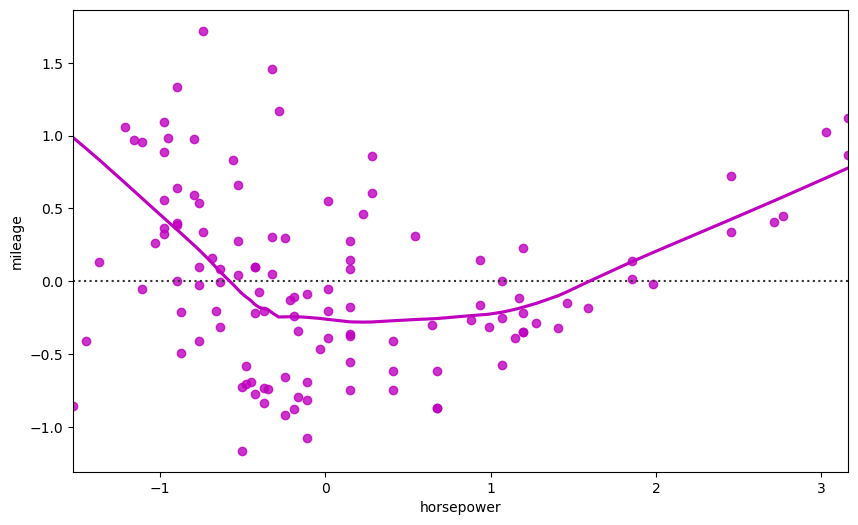

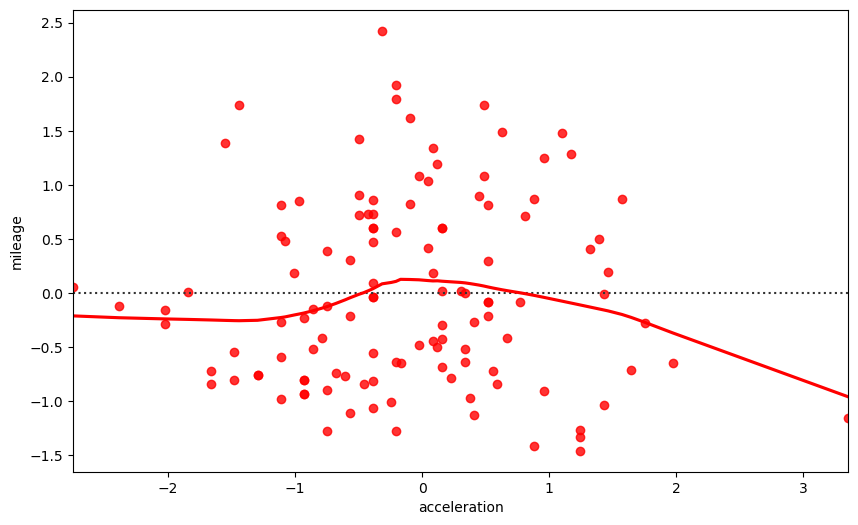

In [33]:
fig=plt.figure(figsize=(10,6))
sns.residplot(x=x_test['horsepower'],y=y_test['mileage'],lowess=True,color='m')

fig=plt.figure(figsize=(10,6))
sns.residplot(x=x_test['acceleration'],y=y_test['mileage'],lowess=True,color='r')